* Assignment Problems: Data set 50_StartUps.csv file
1. Normalize numeric columns using at least two normalization techniques mentioned in the chapter(Use your python skills)
2. Apply at least 5 missing values on any one of the columns then fill with any of the filling techniques mentioned above(except 3 mean() filling)
3. show scatter plot of numeric columns against each other, apply labelings
4. get manhattan and euclidean distance matrix for numeric columns,choose any observation and explain who is the closest observation for him
5. describe briefly about the type of States column. 
6. what kind of data is that column explain which column has the highest correaltion against profit after R& D Spendings

In [17]:
import numpy as np
import pandas as pd
data =pd.read_csv('50_Startups .csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.1,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [18]:
# last 5 rows and all columns
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0,California,42559.73
48,542.05,51743.15,0,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [19]:
# How many has rows and columns
data.shape

(50, 5)

In [20]:
# how many dimensions does this dataframe have
data.ndim

2

In [ ]:
# To get the number of rows of a DataFrame.An integer will be returned.
len(data)

In [ ]:
# To get the total number of elements in the DataFrame or Series, use the size attribute. For DataFrames,
 #this is the  product of the number of rows and the number of columns.
data.size

In [ ]:
# The count method can be used to return the number of non-missing values for each column/row of the DataFrame. 
data.count()

In [ ]:
# The describe() method is used for calculating some statistical data like percentile,
# mean and std of the numerical values of the Series or DataFrame.

data.describe().T

In [ ]:
data.info()

## Normalize numeric columns using at least two normalization techniques mentioned in the chapter
Data Normalization: Data Normalization could also be a typical practice in machine learning which consists of transforming numeric columns to a standard scale. In machine learning, some feature values differ from others multiple times. The features with higher values will dominate the learning process.

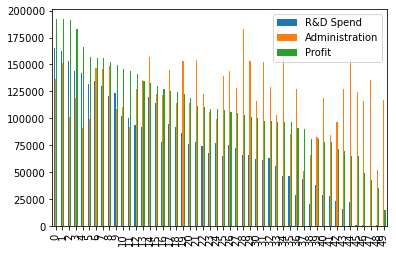

In [22]:
import matplotlib.pyplot as plt
data.plot(kind = 'bar');

In [23]:
# I applied the copy method so that the original data does not change.
data_copy=data.copy()
data_copy.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.1,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     object 
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(3), object(2)
memory usage: 2.1+ KB


In [ ]:
# I select only numeric data
data_copy=data_copy.select_dtypes(include = ['float64'])
data_copy.head()

In [ ]:
## all values are converted to change from 0 to 1
from sklearn import preprocessing
preprocessing.normalize(data_copy)

In [ ]:
data_copy.head()

In [ ]:
## min max conversion (100 to 200)
min_max_scaler =preprocessing.MinMaxScaler(feature_range=(100,200))
min_max_scaler.fit_transform(data_copy)

### We can store categorical data in numeric values with the encoding method in order to be able to operate in the dataframe containing numeric categorical data.

In [2]:
import numpy as np
import pandas as pd
data_encoder =pd.read_csv('50_Startups .csv')
data_encoder.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.1,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### multiple class transformation

In [4]:
from sklearn.preprocessing import LabelEncoder
lbe =LabelEncoder()
lbe.fit_transform(data_encoder['State'])

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0])

In [5]:
lbe.fit_transform(data_encoder['Marketing Spend'])

array([45, 42, 41, 40, 39, 38,  3, 35, 34, 33, 18, 19, 20, 21, 22, 23, 24,
       25, 27,  0, 29, 30, 31, 32,  6,  5,  4, 36,  2,  1, 47, 46, 44, 17,
       16, 15, 14, 13, 11, 10,  9,  8,  7, 37, 26, 12, 28,  0,  0, 43])

In [25]:
# Here, I store the data type objects as numeric data with the encoding method.

## labels = data['Marketing Spend'].astype('category').cat.categories.tolist()
## replace_map_comp = {'Marketing Spend': {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
## data.replace(replace_map_comp, inplace=True)
## print(data.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80               46    New York  192261.83
1  162597.70       151377.59               43  California  191792.06
2  153441.51       101145.55               42     Florida  191050.39
3  144372.41       118671.85               41    New York  182901.99
4  142107.34        91391.77               40     Florida  166187.94


In [26]:
# labels = data['State'].astype('category').cat.categories.tolist()
# replace_map_comp = {'State': {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
# data_.replace(replace_map_comp, inplace=True)
# print(data_copy.head())

   R&D Spend  Administration  Marketing Spend  State     Profit
0  165349.20       136897.80               46      3  192261.83
1  162597.70       151377.59               43      1  191792.06
2  153441.51       101145.55               42      2  191050.39
3  144372.41       118671.85               41      3  182901.99
4  142107.34        91391.77               40      2  166187.94


In [27]:
data['State'].dtypes

dtype('int64')

In [28]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,46,3,192261.83
1,162597.70,151377.59,43,1,191792.06
2,153441.51,101145.55,42,2,191050.39
3,144372.41,118671.85,41,3,182901.99
4,142107.34,91391.77,40,2,166187.94


In [29]:
from sklearn.preprocessing import MaxAbsScaler

abs_scaler = MaxAbsScaler()

abs_scaler.fit(data_copy)

abs_scaler.max_abs_

scaled_data = abs_scaler.transform(data_copy)

df_scaled = pd.DataFrame(scaled_data, columns =data_copy.columns)


df_scaled.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,1.000000,0.749527,0.958333,1.000000,1.000000
1,0.983359,0.828805,0.895833,0.333333,0.997557
2,0.927985,0.553781,0.875000,0.666667,0.993699
3,0.873136,0.649738,0.854167,1.000000,0.951317
4,0.859438,0.500378,0.833333,0.666667,0.864383


In [30]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler
df_std = pd.DataFrame(std_scaler.fit_transform(data_copy), columns=data_copy.columns)
df_std.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,2.016411,0.560753,1.565574,1.212678,2.011203
1,1.955860,1.082807,1.356273,-1.212678,1.999430
2,1.754364,-0.728257,1.286506,0.000000,1.980842
3,1.554784,-0.096365,1.216738,1.212678,1.776627
4,1.504937,-1.079919,1.146971,0.000000,1.357740


<AxesSubplot:>

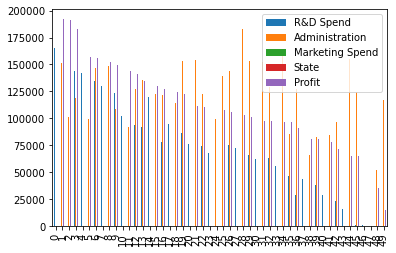

In [31]:
import matplotlib.pyplot as plt
data_copy.plot(kind = 'bar')

### Apply at least 5 missing values on any one of the columns then fill with any of the filling techniques
### mentioned above(except mean() filling)

In [16]:
# There is no empty data
data_copy.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
# IndexError: iloc cannot enlarge its target object
data_copy.iloc[::,10,4]=np.nan
data_copy.head()

In [38]:
import numpy as np
import pandas as pd
data_1 =pd.read_csv('50_Startups .csv')
data_1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.1,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [39]:
data_1.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [40]:
data_1.iloc[::10,4]=np.nan
data_1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.1,New York,NaN
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [41]:
# There is 5(Profit) empty data
data_1.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             5
dtype: int64

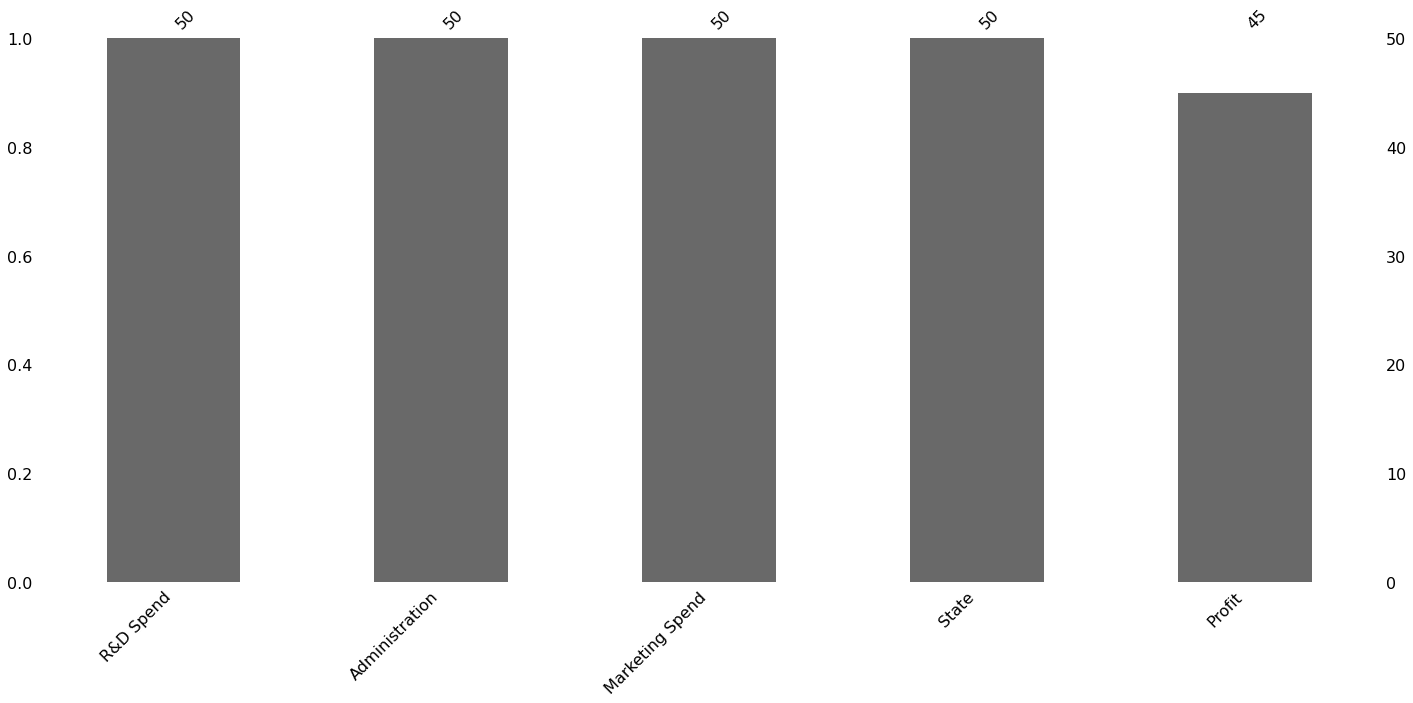

In [9]:
# visualization for missing data
import missingno as msno
msno.bar(data_1);

In [ ]:
 #3 msno.matrix(data_1);

In [42]:
## one of the columns then fill with any of the filling techniques  mentioned above(except mean() filling)
 #  each space is filled with the next value
   #  Space left on line 0

data_1_full = data.fillna(method = "ffill")
data_1_full.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.1,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [43]:
data_1_full.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### show scatter plot of numeric columns against each other, apply labelings

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
data_1_full.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.1,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [45]:
data_1_full.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend     object
State               object
Profit             float64
dtype: object

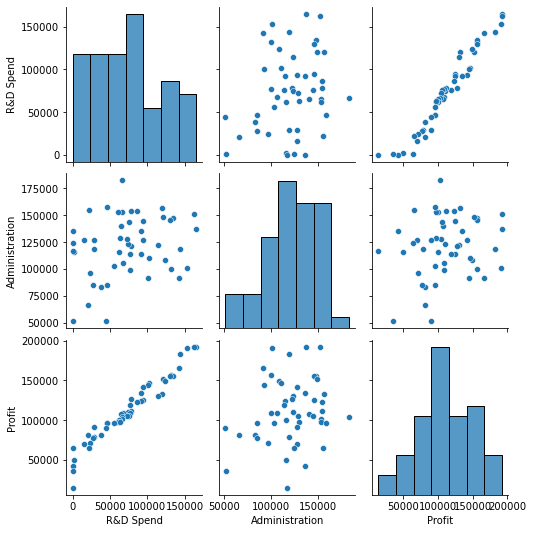

In [46]:
sns.pairplot(data_1_full)

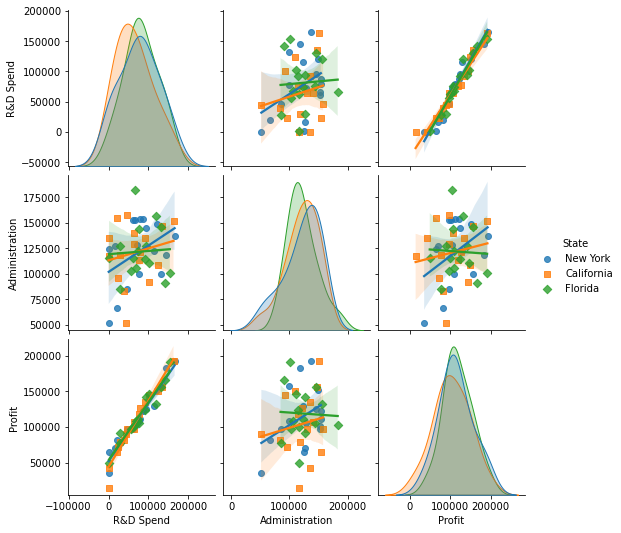

In [47]:
sns.pairplot(data_1_full, kind ="reg", hue = 'State' , markers = ['o','s','D'])

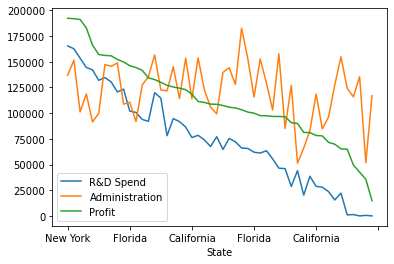

In [48]:
data_1_full.plot(x="State", y=["R&D Spend", "Administration", "Profit"])
plt.show()

## get manhattan and euclidean distance matrix for numeric columns

In [49]:
data_1_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     object 
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(3), object(2)
memory usage: 2.1+ KB


#### Euclidean and manhhattan distance 

In [ ]:
##  Marketing Spend  and State  we can't use all data because it is object data type.
##  We will only be able to use numeric data
from sklearn.metrics import pairwise_distances
data_1_precomputed= pairwise_distances(data_1_full,metric = 'euclidean')

In [50]:
#Euclidean Distance:

x = data_1_full['R&D Spend']
y = data_1_full['Profit']
dist = (np.linalg.norm(x-y))
dist



282414.8392541401

In [51]:
#Euclidean Distance:

p1 = np.sum([(a * a) for a in x]) 
p2 = np.sum([(b * b) for b in y]) 
p3 = -1 * np.sum([(2 * a*b) for (a, b) in zip(x, y)]) 
dist = np.sqrt(np.sum(p1 + p2 + p3))
print(dist)

282414.83925414004


In [52]:
dist = np.sqrt(np.sum([(a-b)*(a-b) for a, b in zip(x, y)]))

print("Euclidean distance between two series is:", dist)

Euclidean distance between two series is: 282414.8392541401


In [53]:
## Manhattan distance
x = data_1_full['R&D Spend']
y = data_1_full['Profit']
from scipy.spatial.distance import cityblock
cityblock(x, y)

1914551.18

 * EUCLIDEAN
 * observation and explain who is the closest observation for him .Why ?Because:Manhatten distance is two-dimensional metric defined in a different geometr to Euclidean space, in wich movement is restricted to north-south, east-west directions only.

## describe briefly about the type of States column. what kind of data is that column

In [54]:
data_1_full['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [55]:
data_1_full['State'].head()

0      New York
1    California
2       Florida
3      New York
4       Florida
Name: State, dtype: object

In [56]:
data_1_full['State'].tail()

45      New York
46       Florida
47    California
48      New York
49    California
Name: State, dtype: object

In [57]:
data_1_full['State'].shape

(50,)

In [86]:
data_1_full['State'].dtype

dtype('O')

In [ ]:
## series the info attribute is not used
data_1_full['State'].info()

In [87]:
## dimension
data_1_full['State'].ndim

1

In [89]:
type(data_1_full['State'])

pandas.core.series.Series

In [90]:
type(data_1_full)

pandas.core.frame.DataFrame

###  Highest correlation of profit with other columns after R&D : Administration  Why ?Because The values of the other two variables are stored as Strings.State Nominal Data type(Categoric).If I had stored numeric values with the  Marketing Spend , then the answer would have been.....MARKETING SPEND

In [58]:
# just numeric variables
data_1_full =data_1_full.select_dtypes(include=['float64','int64'])
data_1_full.head()

,R&D Spend,Administration,Profit
0,165349.20,136897.80,192261.83
1,162597.70,151377.59,191792.06
2,153441.51,101145.55,191050.39
3,144372.41,118671.85,182901.99
4,142107.34,91391.77,166187.94


In [59]:
data_1_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   R&D Spend       50 non-null     float64
 1   Administration  50 non-null     float64
 2   Profit          50 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


In [ ]:
##  Marketing Spend  is  a object   cannot be used in calculation(Numeric values stored as String)
Corr =data_1_full['Profit'].corr(data_1_full['Marketing Spend'])
print("Corelation between Profit and Administration",Corr)

In [60]:
Corr =data_1_full['Profit'].corr(data_1_full['Administration'])
print("Corelation between Profit and Administration",Corr)

Corelation between Profit and Administration 0.20071656826872125


In [61]:
Corr =data_1_full['Profit'].corr(data_1_full['R&D Spend'])
print("Corelation betwwen Profit and R&D Spend",Corr)

Corelation betwwen Profit and R&D Spend 0.9729004656594832


In [62]:
data_1_full.corr()

,R&D Spend,Administration,Profit
R&D Spend,1.000000,0.241955,0.972900
Administration,0.241955,1.000000,0.200717
Profit,0.972900,0.200717,1.000000


In [97]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.1,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [98]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0,California,42559.73
48,542.05,51743.15,0,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40
